# 6.5 Machine Learning Part 2


## This script contains the following:
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering¶

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path =r'/Users/jazmingutierrez/Sept2024LifeExpectancy'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Year,Life Expectancy,Prevalence of Undernourishment,CO2,Health Expenditure,Education Expenditure,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Disease Type
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.0,9.861581,3.373310,10.809000,49.154430,2179727.10,9689193.70,5795426.38,Communicable
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.0,4.483516,2.920000,4.004000,49.154430,1392080.71,11190210.53,2663516.34,Communicable
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,NonCommunicable
3,3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.0,5.865939,2.981845,5.920000,21.788660,1697.99,695.56,13636.64,NonCommunicable
4,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.0,2.484370,3.867370,2.493000,82.723628,144678.14,65271.91,481740.70,NonCommunicable


## 2. Elbow technique

In [6]:
df_numeric = df.select_dtypes(include=[float, int])


/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

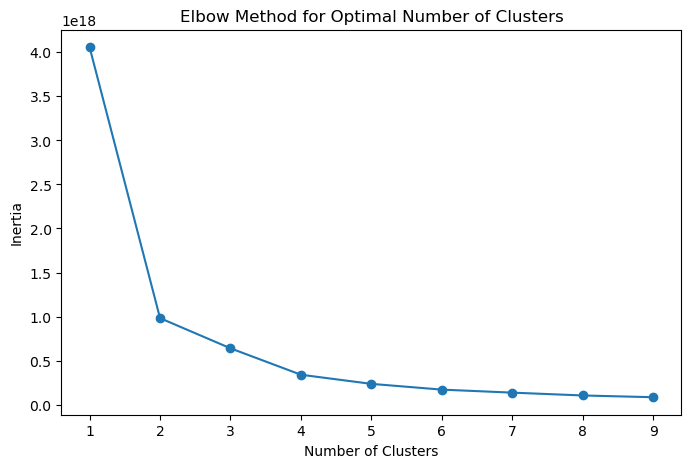

In [7]:


# Define the range of clusters to test
num_cl = range(1, 10)   
inertias = []

# Calculate the inertia for each number of clusters
for i in num_cl:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(num_cl, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

The elbow shows to have 3 clusters the inertia drops between 2 and 3 clusters after 3 clusters the rate of decrease in inertia becomes more gradual.

## 3. K-Means Clustering

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [9]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
df['clusters'] = kmeans.fit_predict(df_numeric)

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
df.head()

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Year,Life Expectancy,Prevalence of Undernourishment,CO2,Health Expenditure,Education Expenditure,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Disease Type,clusters
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.0,9.861581,3.373310,10.809000,49.154430,2179727.10,9689193.70,5795426.38,Communicable,0
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.0,4.483516,2.920000,4.004000,49.154430,1392080.71,11190210.53,2663516.34,Communicable,0
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,NonCommunicable,0
3,3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.0,5.865939,2.981845,5.920000,21.788660,1697.99,695.56,13636.64,NonCommunicable,0
4,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.0,2.484370,3.867370,2.493000,82.723628,144678.14,65271.91,481740.70,NonCommunicable,0


In [12]:
df['clusters'].value_counts()

clusters
0    3268
2      19
1      19
Name: count, dtype: int64

In [13]:
#Filtering cluster 1 countries
cluster_1_countries = df[df['clusters']==1]
# Display the countries in CLuster 1
print(cluster_1_countries[['Country Name']])

     Country Name
72          India
246         India
420         India
594         India
768         India
942         India
1116        India
1290        India
1464        India
1638        India
1812        India
1986        India
2160        India
2334        India
2508        India
2682        India
2856        India
3030        India
3204        India


In [14]:
#Filtering cluster 2 countries
cluster_2_countries = df[df['clusters']==2]
# Display the countries in CLuster 2
print(cluster_2_countries[['Country Name']])

     Country Name
32          China
206         China
380         China
554         China
728         China
902         China
1076        China
1250        China
1424        China
1598        China
1772        China
1946        China
2120        China
2294        China
2468        China
2642        China
2816        China
2990        China
3164        China


#### India is only in Cluster 1, China is only in cluster 2, Meaning China and India have unique combinations of life expectancy, sanitation, injury rates, and non communicable diseases. Cluster 0 has lower injuries and non-communicable diseases and higher life expectancy and sanitation levels, this represents countries as devleoped or higher income countries where public health infastructure is more advanced. 

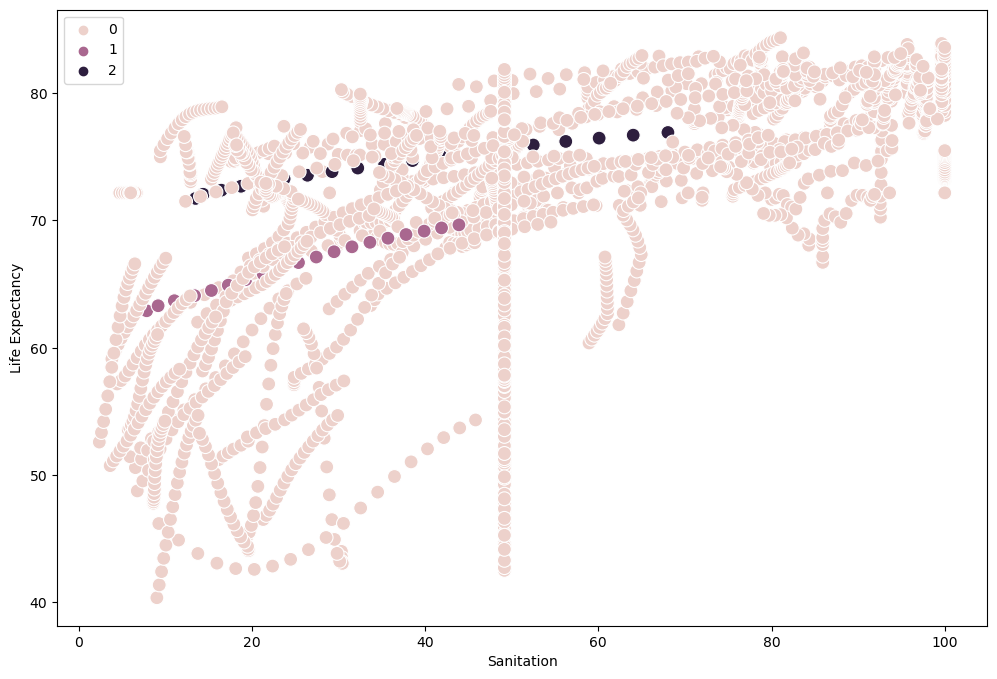

In [15]:
# Plot the clusters for the "Sanitation" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sanitation'], y=df['Life Expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sanitation') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

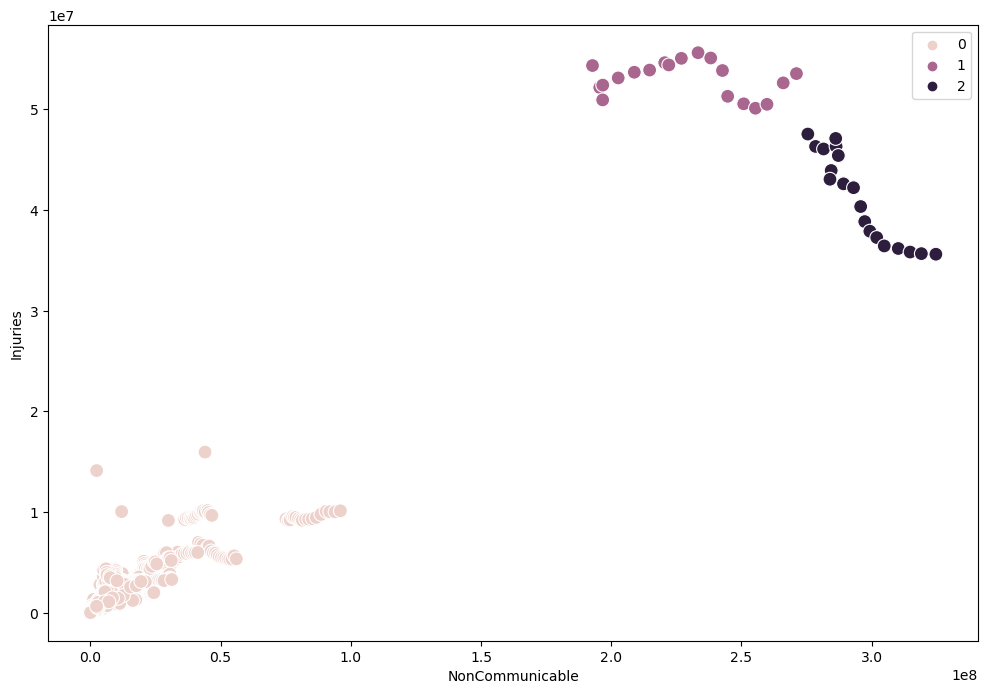

In [16]:
# Plot the clusters for the "NonCommunicable" and "Injurues" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['NonCommunicable'], y=df['Injuries'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('NonCommunicable') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.show()

8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
- Sanitation vs Life Expectancy
The majority of points fall into 0 cluster, these countries have a wide range of sanitation levels demostrating high life expectancy can be high even with some varibility in sanitation levels. Cluster 1 can be considered the transitional group with countries improving sanitation levles. Cluster 2 demonstrates a tight grouping of countries with lower sanitation levels but relatively high life expecatncy. 

- Injuries vs NonCommunicabloe diseases 
0 cluster represents countries with lower number of injuries and nonCommunicable diseases, meaning these countires have healthier population. Cluster 1 contains moderate levels of NonCommunicable diseases and higher number of injuries, Contries are in transition where industrialization leads to higher injury levles and increasing of Noncummunicale diseases due to lifestlye changes. Cluster 2 contains countries with high number of Noncommunicabke diseases and injuries, could be due to higher aging population and lifestlye factor. 

In [17]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [18]:
df.groupby('cluster').agg({'Injuries':['mean', 'median'], 
                         'NonCommunicable':['mean', 'median'], 
                         'Life Expectancy':['mean', 'median'],
                          'Sanitation':['mean', 'median']})

Injuries               NonCommunicable                \
                     mean        median            mean        median   
cluster                                                                 
dark purple  4.130631e+07  4.222731e+07    2.954467e+08  2.930191e+08   
pink         7.849097e+05  2.404031e+05    4.432853e+06  1.335058e+06   
purple       5.305942e+07  5.356391e+07    2.283956e+08  2.269106e+08   

            Life Expectancy          Sanitation             
                       mean   median       mean     median  
cluster                                                     
dark purple       74.417368  74.4090  37.187109  35.329404  
pink              69.886787  72.1685  51.597422  49.154430  
purple            66.533526  66.6930  25.506500  25.379388

10. Propose what these results could be useful for in future steps of an analytics pipeline.
- Dark purple cluster has highest NonCommunicable diseases and injuries but lower life expectancy and sanitation. Pruple cluster has higher life expectancy and sanitation and pink cluster has a moderate values across all variables. The table can serve as a foundation for deeper analysis and action 